## 2.1 Template Matching 
<br>

## Introduction

In this warm-up section, we will address the problem of detection and recognition using Template Matching (http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html). 

Template matching is a 'brute-force' algorithm for object recognition. The most basic method of template matching is to directly compare the grayscale images, without using edge detection. For example, if you were trying to detect, let's say a football, you will need to create a base template of the object. During the operation, the template matching algorithm would analyze the current image to find areas which are similar to the template. This basic approach is quite limited. For one thing, it is not robust to inconsistent changes in brightness within the image. If the template image has strong features, a feature-based approach may be considered; the approach may prove further useful if the match in the search image might be transformed in some fashion. For templates without strong features, or for when the bulk of the template image constitutes the matching image, a template-based approach may be effective. 

In the naive approach, the difference between the template and the matching area is computed pixel by pixel and used to calculate the overall error. It is possible to reduce the number of sampling points by reducing the resolution of the search and template images by the some factor and performing the operation on the resultant downsized images (multiresolution, or Pyramid (image processing)), providing a search window of data points within the search image so that the template does not have to search every viable data point or a combination of both.



<img src="https://pythonspot-9329.kxcdn.com/wp-content/uploads/2015/05/templateMatch.jpeg">
</img>

Template matching example. Left: Template image. Right: Input image with the resulting image highlighted.  



## Section objectives: 

In this section, we will explore the advantages and disadvantages of template matching method. However, in contrast with the previous Chapter, we will leave most of the implementation for the lector (i.e. you).

The following section will introduce to the most common metrics used for the matching distance and how to are used in OpenCV. Your task will be to __a)__ Implement each metric *by hand* __b)__ compare the accuracy against the OpenCV method __c)__ Analyse and report your observations for each metric in 3 exercises and one mini-challenge.

As the final exercise, you will be given a set of more "challenging" data examples where using what you *learned before*, you will be asked to detect several objects in the scene. Your resulting algorithm __should have the given set of inputs and outputs__.



## Distance, minimums and maximums

The two (and pretty much only) important parts of the Naive Template Matching algorithm is the *distance transform*, i.e. the metric to know if we found a match or not, and the global minima detection. 

For an  Input image $I$ if size $W\times H$, a template Image $T$ of size $w\times h$; ($w<W, h<H$), the distance methods implemented in OpenCv are the following: 

* Mean Squared Difference Method=CV_TM_SQDIFF

\begin{equation*}
R(x,y)= \sum _{x',y'} (T(x',y')-I(x+x',y+y'))^2 
\end{equation*}

* Normalized Mean Squared Difference Method=CV_TM_SQDIFF_NORMED
\begin{equation*}
        R(x,y)= \frac{\sum_{x',y'} (T(x',y')-I(x+x',y+y'))^2}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}
\end{equation*}

* Cross Correlation Method=CV_TM_CCORR
\begin{equation*}
        R(x,y)= \sum _{x',y'} (T(x',y') \cdot I(x+x',y+y'))
\end{equation*}

* Normalized Cross Correlation method=CV_TM_CCORR_NORMED
\begin{equation*}
        R(x,y)= \frac{\sum_{x',y'} (T(x',y') \cdot I(x+x',y+y'))}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}}
\end{equation*}

* Correlation Coefficient Method=CV_TM_CCOEFF
\begin{equation*}
        R(x,y)= \sum _{x',y'} (T'(x',y') \cdot I'(x+x',y+y'))
\end{equation*}

where

\begin{equation*}
\begin{array}{l} T'(x',y')=T(x',y') - 1/(w \cdot h) \cdot \sum _{x'',y''} T(x'',y'') \\ I'(x+x',y+y')=I(x+x',y+y') - 1/(w \cdot h) \cdot \sum _{x'',y''} I(x+x'',y+y'') 
\end{array}
\end{equation*}

* Normalized  Normalized Correlation Coefficient=CV_TM_CCOEFF_NORMED
\begin{equation*}
        R(x,y)= \frac{ \sum_{x',y'} (T'(x',y') \cdot I'(x+x',y+y')) }{ \sqrt{\sum_{x',y'}T'(x',y')^2 \cdot \sum_{x',y'} I'(x+x',y+y')^2} }
\end{equation*}


Please notice that the dimensions of the output image, $R$, will depend on how you handle the edges. The easiest way is to ser the return an output image of size $(W-w+1, H-h+1)$ 

After the function finishes the comparison, the resulting image will contain an image map with the obtained values. In OpenCV, the best matches can be found as global minimums or maximums (depending which matric you used) using the minMaxLoc() function. 

### **Exercise 2.1.1**

From the functions listed above, indicate if the best matching position is located either in the local minimums or in the maximums. 

*__Write your answer here:__*

The best matching position is located in the local minimums for 
    - Mean Squared Difference Method
    - Normalized Mean Squared Difference Method
The best matching position is located in the local maximums for 
    - Cross Correlation Method
    - Normalized Cross Correlation Method
    - Correlation Coefficient Method
    - Normalized Correlation Coefficient


### Exercise 2.1.2

Implement (at least 3) of the functions listed above, and use them as arguments in the base method provided

In [3]:
import cv2 as cv
import numpy as np
import os
import math
from utils import *
%matplotlib inline

In [4]:
# FIXED input images to use
img_rgb  = cv.imread('../data/space-invaders_1.jpg')
img_gray = cv.imread('../data/space-invaders_1.jpg',0)
template = cv.imread('../data/template_0.png',0)


def TemplateMatching(input_image, template, distance_function):
    
    """
    Given an input image, iterates over the image and computes the distance w/r
    the template, using a given distance function. 

    :input_image:       Input image. :) 
    :template:          The Template Image.
    :distance_function  Function used to compute the distance. The function should receive a image patch 
                        and a template as inputs.
    :return:            The distance map.
    """
    W = input_image.shape[1];
    H = input_image.shape[0];
    
    w = template.shape[1];
    h = template.shape[0];

    # Output image/map
    dist_map = np.zeros((H-h+1,W-w+1), dtype=np.float32)

    # we could avoid the fors by using lambda funnctions.
    for y in range(dist_map.shape[1]):
            for x in range(dist_map.shape[0]):
                # We take just the sub-patch where to compute the distance
                holder_patch = input_image[x:x+h,y:y+w];
                # for each point we compute the distance w/r the template
                dist_map[x,y]= distance_function(holder_patch,template); 
                    
    return dist_map


__Your answer__

In [9]:
# Example:
def dummyDistance(input_image_patch, template):
    difference = np.array([ (float(x)-float(y)) for x,y in zip(template.ravel(),input_image_patch.ravel())])
    
    ssq = np.sum(difference**2)
    
    return  ssq;

#How to call it:
dist_map = TemplateMatching(img_gray,template,dummyDistance)

In [ ]:
# Code here another 3 distance functions.

def crossCorrelation(input_image_patch, template):
    correlation = np.array([ (float(x) * float(y)) for x,y in zip(template.ravel(),input_image_patch.ravel())])
    
    ssq = np.sum(correlation)
    
    return ssq

dist_map2 = TemplateMatching(img_gray,template,crossCorrelation)

In [35]:
def Normalized_crossCorrelation(input_image_patch, template):
    
    correlation = np.array([ (float(x) * float(y)) for x,y in zip(template.ravel(),input_image_patch.ravel())])
    
    numerator = np.sum(correlation)
    denominator = np.sqrt( float(np.sum(template**2)) * float(np.sum(input_image_patch **2)) )   
    
    if (denominator == 0):
        ssq = 0
    else:
        ssq = float(numerator)/ float(denominator)
    
    return ssq

dist_map3 = TemplateMatching(img_gray,template,Normalized_crossCorrelation)

In [52]:
def correlationCoefficient(input_image_patch, template):
    t_w, t_h = template.shape
    
    template_prime = template - 1.0/float((t_w * t_h)) * (np.sum(template))
    image_prime = input_image_patch - 1.0/float((t_w * t_h)) * (np.sum(input_image_patch))
    
    ssq = np.sum(template_prime * image_prime)
    
    return ssq

dist_map4 = TemplateMatching(img_gray,template,correlationCoefficient)
    

### Exercise 2.1.3 

Check your outputs by using the build-in functions in OpenCV to compute the maps for each of the methods implemented. Show in each cell: your map and the OpenCV map.

__ Your answer__

Text(0.5,1,'OpenCv distance')

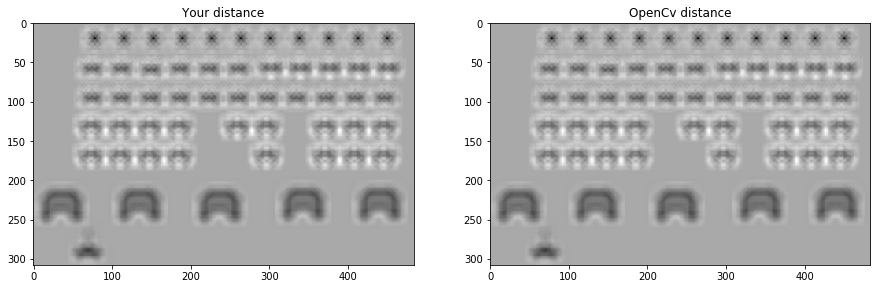

In [11]:
#your code here.

#Example:
res = cv.matchTemplate(img_gray,template,cv.TM_SQDIFF)

# Display two example maps
fig, ax = plt.subplots(1, 2, figsize=(15, 7),squeeze=False)

# Show image, add title
display_image(dist_map, axes=ax[0][0])
ax[0][0].set_title("Your distance")

display_image(res, axes=ax[0][1])
ax[0][1].set_title("OpenCv distance")

#Do the same for your other 3 functions


Text(0.5,1,'OpenCv distance')

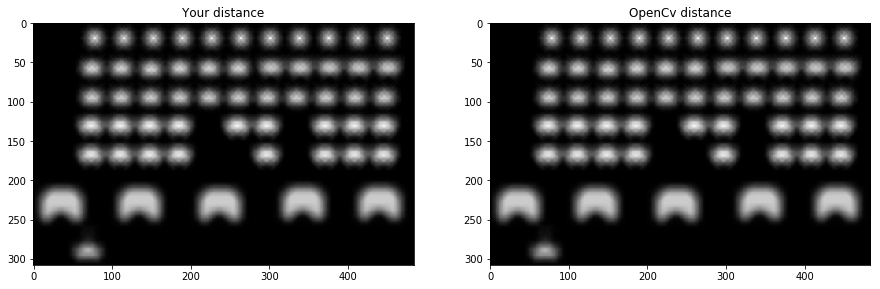

In [15]:
#Example: Cross Correlation Coefficient Method
res2 = cv.matchTemplate(img_gray,template,cv.TM_CCORR)

# Display two example maps
fig, ax = plt.subplots(1, 2, figsize=(15, 7),squeeze=False)

# Show image, add title
display_image(dist_map2, axes=ax[0][0])
ax[0][0].set_title("Your distance")

display_image(res2, axes=ax[0][1])
ax[0][1].set_title("OpenCv distance")


Text(0.5,1,'OpenCv distance')

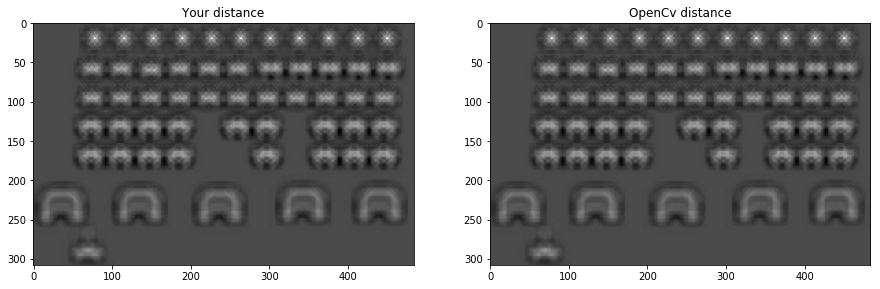

In [53]:
#Example: Correlation Coefficient Method
res4 = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF)

# Display two example maps
fig, ax = plt.subplots(1, 2, figsize=(15, 7),squeeze=False)

# Show image, add title
display_image(dist_map4, axes=ax[0][0])
ax[0][0].set_title("Your distance")

display_image(res4, axes=ax[0][1])
ax[0][1].set_title("OpenCv distance")

Text(0.5,1,'OpenCv distance')

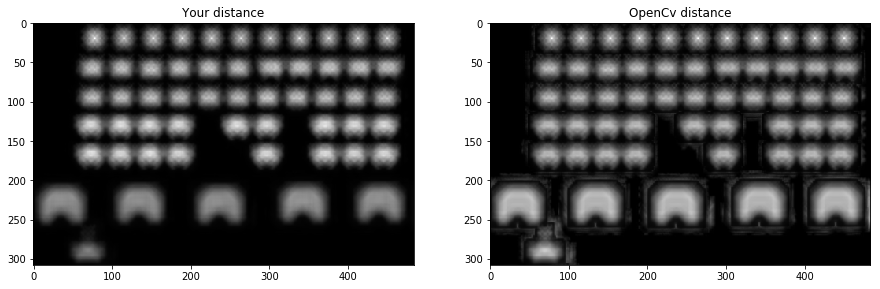

In [36]:
#Example:
res3 = cv.matchTemplate(img_gray,template,cv.TM_CCORR_NORMED)

# Display two example maps
fig, ax = plt.subplots(1, 2, figsize=(15, 7),squeeze=False)

# Show image, add title
display_image(dist_map3, axes=ax[0][0])
ax[0][0].set_title("Your distance")

display_image(res3, axes=ax[0][1])
ax[0][1].set_title("OpenCv distance")

In [58]:
print(np.max(res3))
print(np.max(dist_map3))

0.9999999
377.11325


As you may have noticed, the self-implemented method is quite slow even for small images, since it increases quadratically for the input image and also the template image. OpenCV implements the same function optimally (low-level implementation).

### Finding the local minimums/maximums

As explained before, in order to find the location of our possible object we need to find the minimum or maximum point in our resulting distance map. OpenCV minMaxLoc():

https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#void%20minMaxLoc(InputArray%20src,%20double*%20minVal,%20double*%20maxVal,%20Point*%20minLoc,%20Point*%20maxLoc,%20InputArray%20mask) ,

can be used to find the local minimum and maximum of the single-channel array (1D or 2D). 

However, if we happen to have several objects in the image that we would like to match cv.minMaxLoc() won't give you all the locations. 

### Exercise 2.1.4 

Write your own function: 

`multiMinMax(src, flag, params)`,

which should take an input 2D image `src` and return an `output_array` with the local minimums or maximums depending on the provided `flag` (`flag = "min"` or `flag = "max"`), and a given `params`.

The `params` can be, for example, a _threshold_ for the local minima/maxima, the maximum number of maximums/minimums to return, a difference between the global maxima/minima to be included, etc.



In [59]:
 ## Code here    
    

# Function skeleton
def multiMinMax(src,flag,params):
    
    dummy = []
    
    return summy


# how to draw the ROIS
def drawROIS(src, template, locations, color = (0,0,255)):
    w, h = template.shape[::-1]
    
    img_holder = src.copy();

    for pt in zip(*locations[::-1]):
        cv.rectangle(img_holder, pt, (pt[0] + w, pt[1] + h), color, 2)
    
    return img_holder; 
    

# How should be called:
img_rgb  = cv.imread('../data/space-invaders_1.jpg')
img_gray = cv.imread('../data/space-invaders_1.jpg',0)
template = cv.imread('../data/template_0.png',0)

# For a given distance Map
distance_map_norm_corr = cv.matchTemplate(img_gray,template,cv.TM_CCORR_NORMED)

# Use your function here!
locations = multiMinMax(distance_map_norm_corr,'max',0.95)

# Draw the ROIs 
img_rgb_holder = drawROIS(img_rgb, template, locations)

# example:
display_image(img_rgb_holder)

# How many ROIS did you returned? 
print(np.array(locations).shape)

NameError: name 'summy' is not defined

In [63]:
t = np.array([1,2,3])
t.transpose

<function ndarray.transpose>

## Exercise 2.1.5: 

Now that you are all set up, use the functions above and *try* to detect ALL the matching objects in the input image (Using template Matching).

Rules:

* You can use any metric you want, self-implemented or from OpenCV. 
* You can tweak your multiMinMax to get better results.
* For 1) and 2) and 3) you have to do it in grayscale.
* 4) can use multi-channel heuristics.


### 1) Perfect match <3

Using the base input provided, plot the input image _showing_ the locations of the matching objects for the 2 provided templates.

Follow the code below and provide some insights like:

### Your answers HERE
* Why did you choose that given metric?  
    - We choosed normalized metric to make thresholding easier since the output image values is in between 0 to 1. 
    - The normalized coefficient and normalized MSE metric was 
* How robust to false positives/negatives is your selected metric.
    
* Is the number of output locations the same as the matching objects? 
     - Yes with CCORR metrix it counts the exactly the same nu
    

[]

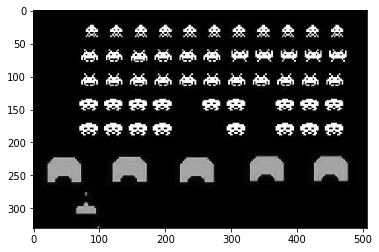

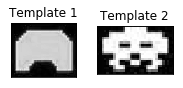

In [7]:
# input images to use
p1_src_rgb    = cv.imread('../data/space-invaders_1.jpg')
p1_src_gray   = cv.imread('../data/space-invaders_1.jpg',0)

# Show the matching of these 2 templates:
p1_template_1 = cv.imread('../data/template_1.png',0)
p1_template_2 = cv.imread('../data/template_2.png',0)

display_image(p1_src_gray)

fig, ax = plt.subplots(1, 2, figsize=(3, 1),squeeze=False)

display_image(p1_template_1, axes=ax[0][0])
ax[0][0].set_title("Template 1")
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

display_image(p1_template_2, axes=ax[0][1])
ax[0][1].set_title("Template 2")
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])


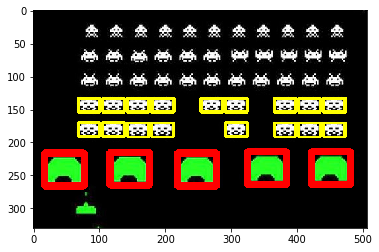

In [8]:
#Your code goes here:"





### 2) Not so perfect Match </3

Plot the input image _showing_ the locations of the matching objects and any false positive. All the _invaders_ in the same row counts as the "same" class. 

Follow the code bellow and provide some insights like:

* How did you select the number of maximums/minimus?  
* How robust to false positives/negatives is your selected metric.
* Is the number of output locations the same as the matching objects? 
* Could you use any of the features from the last chapter to improve the matching?


[]

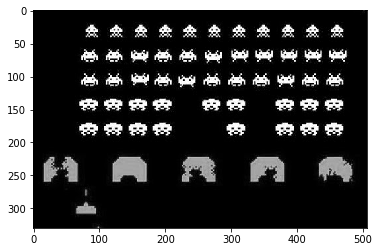

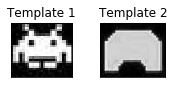

In [15]:
# input
p2_src_rgb    = cv.imread('../data/space-invaders_2.jpg')
p2_src_gray   = cv.imread('../data/space-invaders_2.jpg',0)

# 2 tempaltes (check that tempalte one don't match all the invaders in the same row) 
p2_template_1 = cv.imread('../data/template_3.png',0)
p2_template_2 = cv.imread('../data/template_1.png',0)

display_image(p2_src_gray)

fig, ax = plt.subplots(1, 2, figsize=(3, 1),squeeze=False)

display_image(p2_template_1, axes=ax[0][0])
ax[0][0].set_title("Template 1")
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

display_image(p2_template_2, axes=ax[0][1])
ax[0][1].set_title("Template 2")
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])


101


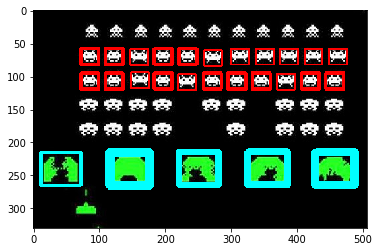

In [16]:
# Your code goes here:


p2_result = drawROIS(p2_result, p2_template_1,locations_1);
p2_result = drawROIS(p2_result, p2_template_2,locations_2,(255,255,0));

display_image(p2_result)

print(len(locations_1[0]))

### 3) Find Waldo.

Finding Waldo (or Wally for our Brittish friends) it's a series of children's puzzle books from back in the 80's. Something like finding Nemo, but harder. In this exercise, you will try to find Waldo using template matching. 

Using the given template (beautifully cut from the input source) use it to find Waldo. 
Plot the input image _showing_ the location of Waldo (if you find it) and any false positive negative. 

In this exercise, you may choose to use any transformation in the input image (like the scale it to save time) or tweak the distance metric. 

You can't modify the template (only scale it).

Follow the code below and provide some insights like:

* What metric seemed to work better this time? 
* Was it different from the previous exercise?
* Could you use any of the features from the last chapter to improve the matching?
* How could you reduce the false positives? 

Save the output in a separate image to visualize easier.


[]

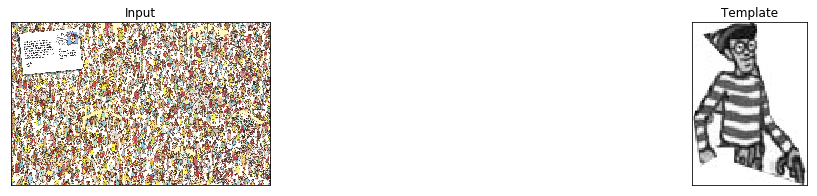

In [11]:
# inputs
p3_src_rgb  = cv.imread('../data/finding_waldo_1.jpg')
p3_src_gray = cv.imread('../data/finding_waldo_1.jpg',0)
p3_template = cv.imread('../data/waldo_template.jpg',0)

fig, ax = plt.subplots(1, 2, figsize=(20, 3),squeeze=False)

display_image(p3_src_rgb, axes=ax[0][0])
ax[0][0].set_title("Input")
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])

display_image(p3_template, axes=ax[0][1])
ax[0][1].set_title("Template")
ax[0][1].set_xticks([])
ax[0][1].set_yticks([])

66852


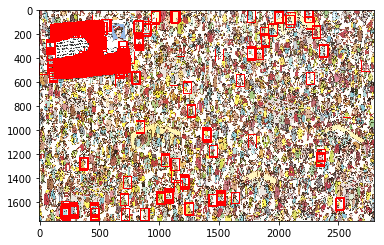

In [12]:
#your code goes here


p3_result = drawROIS(p3_result, p3_template,p3_locations);

display_image(p3_result)

# How many false positives did you get?
print(len(p3_locations[0]))

In [13]:
## Save the output image to make it easier to visualize!!. Submit this with the notebook

cv.imwrite('../../p3_res.png',p3_result)

True

### 4) Find Waldo 2.0.

As you can see, using template matching can be tricky, even when you have a _good_ template. As for the last exercise, you will try to design a good __template__  (it can be done in Paint if you want =P) in order to find Waldo in three different images. In this exercise, you can (if you want) use the information of the 3 RGB channels (to generate a 1 _better_ 1 channel image for example) and transform the input image (for example to homogenize the scale!).

Plot your selected template and the input image _showing_ the location of each Waldo (if you find it) and any false positive.

Follow the code below and provide some insights like:

* Was it different from the previous exercise?
* Could you perform better if you could use more than 1 template to find Waldo? 

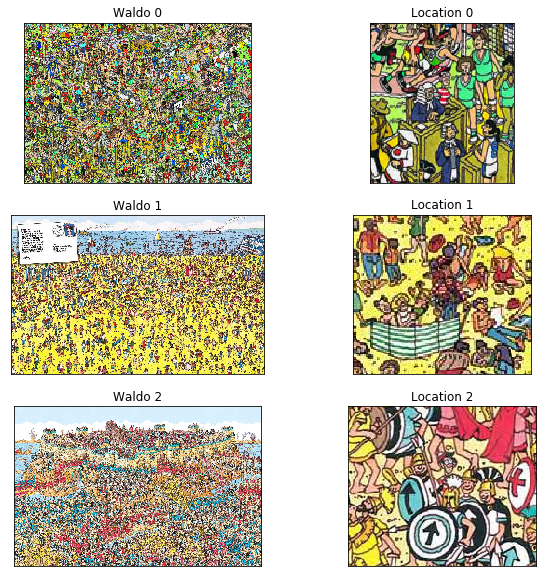

In [14]:
src_images = ["../data/waldo_1.jpg","../data/waldo_2.jpg","../data/waldo_3.jpg"]
loc_images = ["../data/location_1.png","../data/location_2.png","../data/location_3.png"]

src_color = []
src_gray  = []

locations = []
for img in src_images:
    src_color.append(cv.imread(img))
    src_gray.append(cv.imread(img,0))
    
for loc in loc_images:
    locations.append(cv.imread(loc))

    
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for i in range(3):
      
    # Show image, add title + remove tick
    display_image(src_color[i], axes=ax[i][0])
    ax[i][0].set_title("Waldo %d"%i)
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    
    display_image(locations[i], axes=ax[i][1])
    ax[i][1].set_title("Location %d"%i)
    ax[i][1].set_xticks([])
    ax[i][1].set_yticks([])
    

## Your code goes here.
